<center><img src="img/logo_hse_black.jpg"></center>

<h1><center>Data Analysis</center></h1>
<h2><center>Seminar: Linear Classification</center></h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

## Regularization

Queistion:
  * Why we use regularization?
  * What kind of regularization do you know?

L2 - reg
$$
L(X, y, w) = l(X, y, w) + \lambda  \langle w, w \rangle
$$

L1 - reg
$$
L(X, y, w) = l(X,y, w) + \lambda |w|
$$

Elastic net
$$
L(X, y, w) = l(X, y, w) + \lambda_1  \langle w, w \rangle + \lambda_2 |w|
$$

# Linear classification

### Sigmoid function

$$
\sigma(x) = \frac{1}{1 + \exp(-\langle w, x \rangle)}
$$

Or if we use intercept
$$
\sigma(x) = \frac{1}{1 + \exp(-\langle w, x \rangle - w_0)}
$$

We assume that 
$$
\sigma(x) = P(y = 1 | x, w)
$$

Question 
  * 1 - $\sigma(x) =$ ?
  * $\sigma'(x) =$ ?

And we maximize likelihood with minimize log-loss

if $y_i \in \{0, 1\}$
$$
logloss = \frac{1}{N}\sum_{i=1}^n\left[y_i \log(1 + \exp(-\langle w, x \rangle) + (1 -y_i) \log(1 + \exp(\langle w, x \rangle))\right]
$$

if $y_i \in \{-1, 1\}$
$$
logloss = \frac{1}{N}\sum_{i=1}^n\left[\log(1 + \exp(-\langle w, x \rangle \cdot y_i)\right]
$$

## Toy example

Generate data and apply logistic regression

In [2]:
#generate two linear separated samples
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) + [2, 2],
          np.random.randn(20, 2) + [-2, -2]]
y = [-1] * 20 + [1] * 20

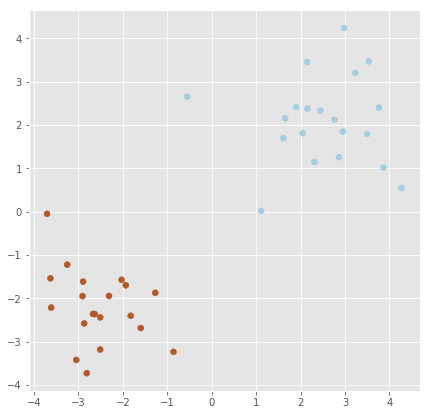

In [3]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(X[:, 0],
           X[:, 1],
           c=y,
           cmap=plt.cm.Paired)

In [4]:
class SimpleLogisticRegression:
    def __init__(self, C = 1.0, fit_intercept = True, penalty = 'l2', max_iter = 5000):
        self.C = C
        self.fit_intercept = fit_intercept
        self.penalty = penalty
        self.max_iter = max_iter
    
    
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        
        if self.fit_intercept:
            #concatenate ones
            X = np.c_[np.ones(X.shape[0]), X]
        
        #zero initialization
        self.coef_ = np.zeros(X.shape[1])
        
        #run grad descent
        self.qual_ = self.grad_descent(X, y, 0.05)
        
    def predict_proba(self, X):
        return np.array([1 / (1 + np.exp(X.dot(self.coef_) + self.intercept_)),\
                         1 / (1 + np.exp(-X.dot(self.coef_) - self.intercept_))])
    
    def predict(self, X):
        predict = (self.predict_proba(X)[1, :] > 0.5).astype(int)
        
        #transform 0 to -1
        predict[predict == 0] = -1
        
        return predict
    
    def decision_function(self, X):
        return X.dot(self.coef_) + self.intercept_

    #labels of classes {1, -1}
    def loss(self, X, y):
        loss = np.mean(np.log(1 + np.exp(-X.dot(self.coef_) * y)))
        if self.penalty == 'l2':
            reg = np.sum(self.coef_ ** 2)
        elif self.penalty == 'l1':
            reg = np.sum(np.abs(self.coef_))
        else:
            raise NotImplementedError
        
        return loss + reg / (self.C * X.shape[0])
    
    def grad_descent(self, X, y, eta ):
        qual = np.zeros(self.max_iter)
        
        for iterations in range(self.max_iter):
            #calculate gradient
            decision_function = -X.dot(self.coef_)
            grad_coef = -np.exp(decision_function * y) / (1 + np.exp(decision_function * y))
            grad_coef *= y
            
            mean_grad = np.mean(X.T * grad_coef, axis = 1)

            w = np.copy(self.coef_)
            self.coef_ -= eta * mean_grad
    
            #add penalty
            if self.penalty == 'l2':
                self.coef_ -= 2 * eta * w / (self.C * X.shape[0])
            elif self.penalty == 'l1':
                self.coef_ -= eta * np.sign(w) / (self.C * X.shape[0])
            else:
                raise NotImplementedError
            qual[iterations] = self.loss(X, y)
        
        if self.fit_intercept:
            self.intercept_ = self.coef_[0]
            self.coef_ = self.coef_[1:]
        else:
            self.intercept_ = 0.0

        return qual

Fit logistic regression and plot desicion boundary

In [5]:
model = SimpleLogisticRegression(C=1.0, 
                           fit_intercept=True, 
                           penalty='l2')
model.fit(X, y)

In [6]:
print('w_0 = %f' % model.intercept_)
print('w_1, w_2 = ', model.coef_)

w_0 = -0.113541
w_1, w_2 =  [-0.91292259 -0.8538947 ]


In [7]:
y_hat = model.predict(X)
y_hat

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1])

In [8]:
y_hat_proba = model.predict_proba(X)
y_hat_proba[:20, :]

array([[0.99631323, 0.99842854, 0.98920287, 0.98769405, 0.98022867,
        0.99344189, 0.98840871, 0.98709704, 0.99212355, 0.96097233,
        0.86699141, 0.97817449, 0.98876487, 0.97150491, 0.99816919,
        0.98388157, 0.75865225, 0.96961838, 0.99697267, 0.95414983,
        0.00372155, 0.03516082, 0.01393339, 0.01984218, 0.00621154,
        0.01970056, 0.0074316 , 0.04393683, 0.04306236, 0.01326958,
        0.01285584, 0.00355267, 0.02656606, 0.01084474, 0.01471548,
        0.06633797, 0.03123993, 0.02564213, 0.00893025, 0.0251713 ],
       [0.00368677, 0.00157146, 0.01079713, 0.01230595, 0.01977133,
        0.00655811, 0.01159129, 0.01290296, 0.00787645, 0.03902767,
        0.13300859, 0.02182551, 0.01123513, 0.02849509, 0.00183081,
        0.01611843, 0.24134775, 0.03038162, 0.00302733, 0.04585017,
        0.99627845, 0.96483918, 0.98606661, 0.98015782, 0.99378846,
        0.98029944, 0.9925684 , 0.95606317, 0.95693764, 0.98673042,
        0.98714416, 0.99644733, 0.97343394, 0.9

In [9]:
dec_func = model.decision_function(X)
dec_func

array([-5.59931133, -6.45417481, -4.51761944, -4.38529003, -3.90355303,
       -5.02047304, -4.44584215, -4.33731148, -4.83597095, -3.20367472,
       -1.87461534, -3.80260852, -4.47741109, -3.52911465, -6.30116241,
       -4.11154194, -1.14530469, -3.46306466, -5.79704191, -3.03544185,
        5.58988669,  3.31202904,  4.25943552,  3.8999035 ,  5.07511481,
        3.90721087,  4.89455432,  3.08007109,  3.10108898,  4.30892294,
        4.34101808,  5.63649639,  3.60119549,  4.51317079,  4.20403048,
        2.64435214,  3.43431981,  3.63754214,  4.70934026,  3.65655726])

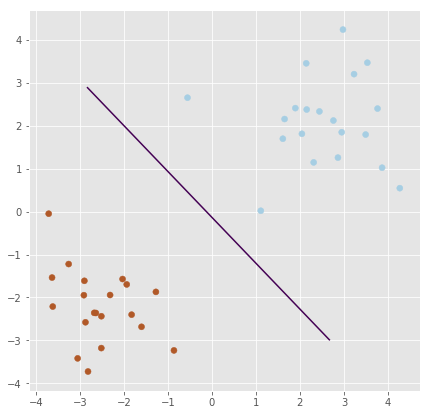

In [10]:
fig, ax = plt.subplots(figsize=(7, 7))
x0, x1 = np.meshgrid(np.arange(-3, 3, 0.1),
                       np.arange(-3, 3, 0.1))
xx0, xx1 = x0.ravel(), x1.ravel()

X_grid = np.c_[xx0, xx1, ]

y_hat = model.decision_function(X_grid)
y_hat = y_hat.reshape(x0.shape)

plt.contour(x0, x1, y_hat, levels=[0])


ax.scatter(X[:, 0],
           X[:, 1],
           c=y,
           cmap=plt.cm.Paired)

Let's watch how change loss by iteration

Text(0, 0.5, 'log-loss with l2')

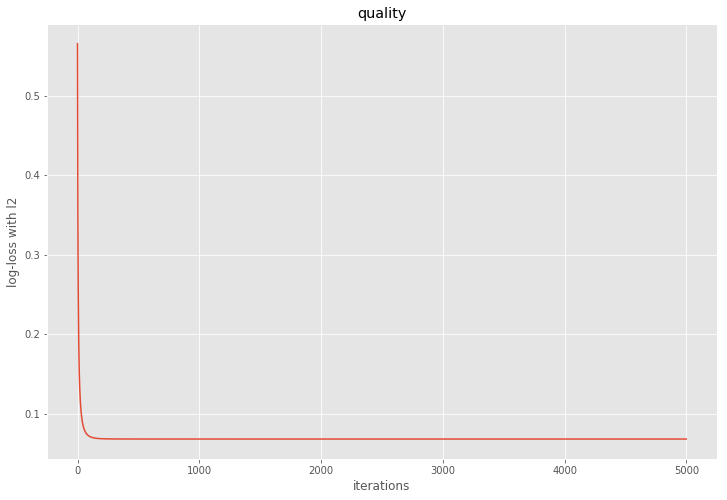

In [11]:
qual = model.qual_
x = np.arange(0, len(qual))
plt.title('quality')
plt.plot(x, qual)
plt.xlabel('iterations')
plt.ylabel('log-loss with l2')

## How to make non-linear decision boundary?

Consider "bublic" dataset

In [12]:
from sklearn.datasets import make_circles

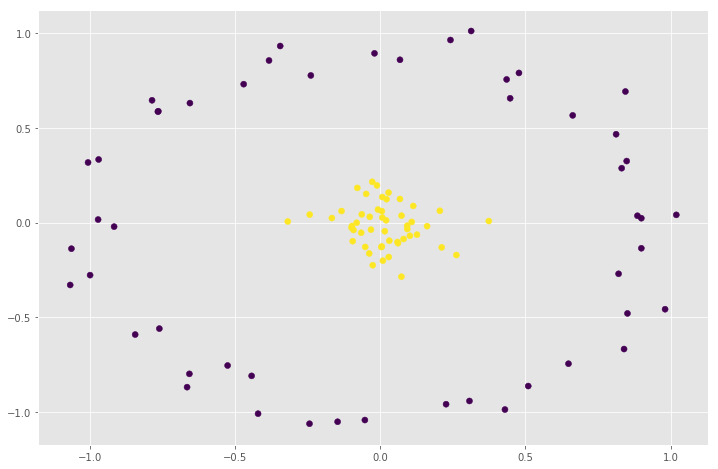

In [13]:
X, y = make_circles(n_samples=100, shuffle=True,
                    noise = 0.1,
                    factor=0.1)
y[y == 0] = -1

plt.scatter(X[:, 0],
            X[:, 1],
            c=y)

It is clear that classes cannot be separated via line.

In [14]:
X_new = np.c_[X[:,0], X[:,1],]
model = SimpleLogisticRegression(C=100000, 
                           fit_intercept=True)
model.fit(X_new, y)

In [15]:
# Error rate
y_hat = model.predict(X_new)
'Accuracy = {}'.format((y == y_hat).mean())

'Accuracy = 0.54'

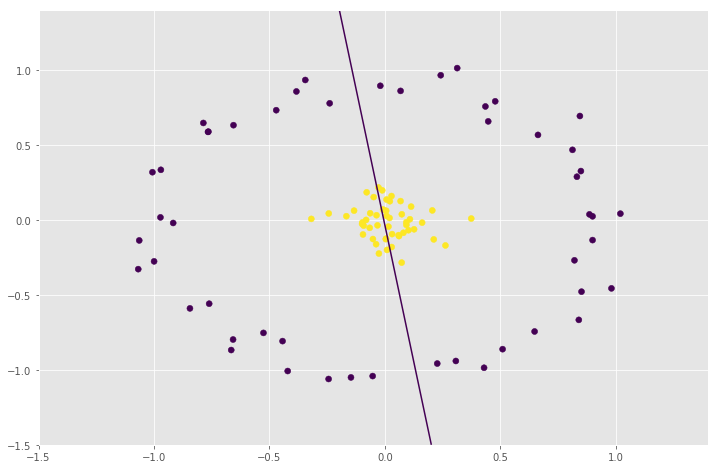

In [16]:
# Plot desicion border

x0, x1 = np.meshgrid(np.arange(-1.5, 1.5, 0.1),
                       np.arange(-1.5, 1.5, 0.1))
xx0, xx1 = x0.ravel(), x1.ravel()

X_grid = np.c_[xx0, xx1, ]

y_hat = model.decision_function(X_grid)
y_hat = y_hat.reshape(x0.shape)

plt.contour(x0, x1, y_hat, levels=[0])
plt.scatter(X[:,0], 
            X[:, 1], 
            c=y)

So what we do is we should add nonliear feature to our model and then project decision boundary on to intial feature space

What feature should we use?

In [17]:
X_new = np.c_[X[:,0], X[:,1], X[:, 0]**2+X[:, 1]**2]
model = SimpleLogisticRegression(C = 100000, 
                           fit_intercept=True)
model.fit(X_new, y)

In [18]:
# Error rate
y_hat = model.predict(X_new)
'Accuracy = {}'.format((y == y_hat).mean())

'Accuracy = 1.0'

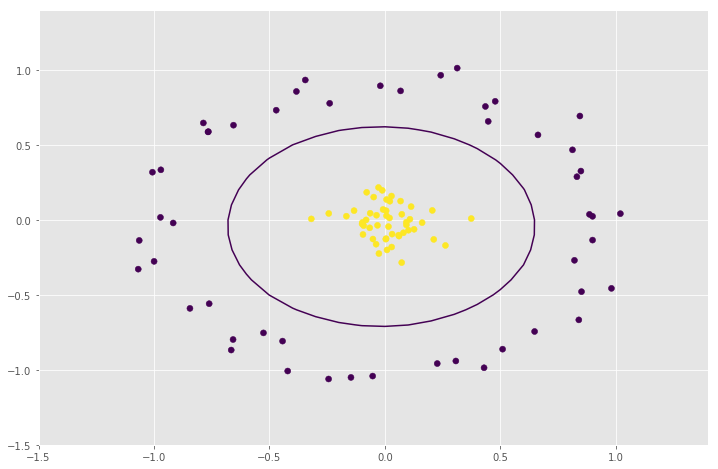

In [19]:
# Plot desicion border

x0, x1 = np.meshgrid(np.arange(-1.5, 1.5, 0.1),
                       np.arange(-1.5, 1.5, 0.1))

xx0, xx1 = x0.ravel(), x1.ravel()

X_grid = np.c_[xx0, xx1, xx0**2 + xx1**2]

y_hat = model.decision_function(X_grid)
y_hat = y_hat.reshape(x0.shape)

plt.contour(x0, x1, y_hat, levels=[0])
plt.scatter(X[:,0], 
            X[:, 1], 
            c=y)

## L1 - reg

L1-reg work like feature selection

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
X_new = np.c_[X[:,0], X[:,1], X[:, 0] ** 2 + X[:, 1] ** 2]
model = SimpleLogisticRegression(C=1, 
                           fit_intercept=True,
                           penalty = 'l1')
model.fit(X_new, y)

In [22]:
model.coef_, model.intercept_

(array([ 1.87710719e-04, -4.07730417e-04, -6.85297664e+00]), 2.882599134163666)

### Coef near useless features is very small

Question for students: Why l1 work like feature-selection?

<center><img src="img/reg.png"></center>

## Real example - sentiment analysis

Load text files amazon_cells_labelled.txt


File format:
Review \t class label \n


### Task
1. Load files and set target features and review in different variables
2. Fit logistic regression to it. Consider text feature preprocessing
3. Output the most valuable coefficients and analyze them

In [23]:
##load file
df = pd.read_csv('sentiment/amazon_cells_labelled.txt', 
                 sep='\t', header=None, 
                 names=['review', 'class'])

df.head()

,review,class
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [24]:
#use CountVectorizer from skleatr
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
vect = CountVectorizer(stop_words='english', #which word don't calculate
                       max_df=0.95, #max frequency of word
                       min_df=5, #min frequency of word
                       )

In [26]:
texts = df.review.values

In [27]:
texts[:10]

array(['So there is no way for me to plug it in here in the US unless I go by a converter.',
       'Good case, Excellent value.', 'Great for the jawbone.',
       'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!',
       'The mic is great.',
       'I have to jiggle the plug to get it to line up right to get decent volume.',
       'If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.',
       'If you are Razr owner...you must have this!',
       'Needless to say, I wasted my money.',
       'What a waste of money and time!.'], dtype=object)

In [28]:
#calulate word frequency for every document
X = vect.fit_transform(texts)

In [29]:
#this method return 'special' class 'sparse-matrix', transform it to usual numpy-array
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [30]:
#get name of words
vect.get_feature_names()

['amazon',
 'arrived',
 'audio',
 'awesome',
 'bad',
 'battery',
 'belt',
 'best',
 'better',
 'big',
 'black',
 'bluetooth',
 'bought',
 'broke',
 'buttons',
 'buy',
 'cable',
 'calls',
 'came',
 'camera',
 'car',
 'case',
 'cases',
 'cell',
 'charge',
 'charger',
 'charging',
 'charm',
 'cheap',
 'clarity',
 'clear',
 'color',
 'comfortable',
 'company',
 'completely',
 'connection',
 'cool',
 'couldn',
 'couple',
 'crap',
 'customer',
 'days',
 'definitely',
 'design',
 'device',
 'did',
 'didn',
 'different',
 'difficult',
 'disappointed',
 'disappointing',
 'disappointment',
 'does',
 'doesn',
 'don',
 'dropped',
 'ear',
 'ears',
 'easily',
 'easy',
 'end',
 'especially',
 'excellent',
 'expect',
 'far',
 'feature',
 'feels',
 'fine',
 'fit',
 'fits',
 'free',
 'gets',
 'going',
 'good',
 'got',
 'great',
 'hands',
 'happy',
 'hard',
 'having',
 'headphones',
 'headset',
 'headsets',
 'hear',
 'helpful',
 'high',
 'highly',
 'hold',
 'horrible',
 'hours',
 'important',
 'impressed

In [31]:
X = vect.fit_transform(texts).toarray()
y = df.loc[:, 'class'].values
y[y == 0] = -1

In [32]:
model = SimpleLogisticRegression()
model.fit(X, y)

Text(0, 0.5, 'log-loss with l2')

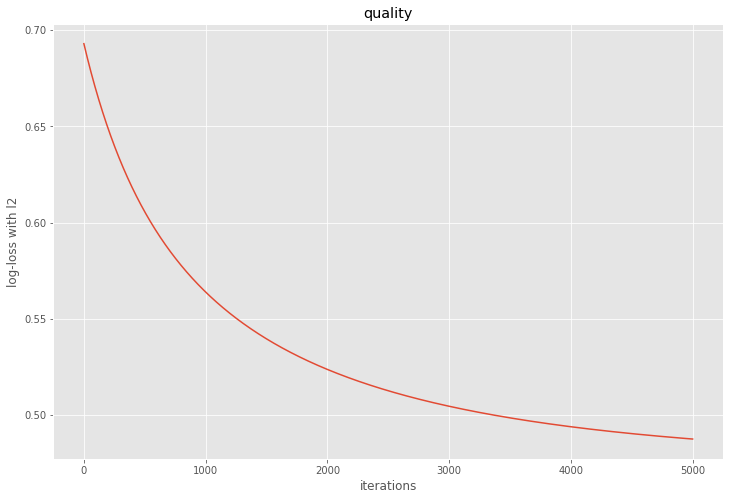

In [33]:
#plot of the quality
qual = model.qual_
x = np.arange(0, len(qual))
plt.title('quality')
plt.plot(x, qual)
plt.xlabel('iterations')
plt.ylabel('log-loss with l2')

In [34]:
y_hat = model.predict(X)
'Accuracy = {}'.format((y == y_hat).mean())

'Accuracy = 0.824'

In [35]:
coefs = model.coef_
words = vect.get_feature_names()

In [36]:
#sort word by it coefs (word with small coef first, with large coef last)
weights = pd.Series(index=words, data=coefs)
weights.sort_values()

poor             -0.911164
bad              -0.806823
worst            -0.772610
money            -0.720465
work             -0.649539
terrible         -0.646645
waste            -0.621910
don              -0.617919
disappointed     -0.604008
doesn            -0.572379
broke            -0.532033
horrible         -0.512622
piece            -0.510862
hear             -0.501713
unit             -0.481827
plug             -0.466986
junk             -0.462510
calls            -0.459491
useless          -0.442034
old              -0.441733
didn             -0.439661
difficult        -0.436854
picture          -0.428514
thing            -0.417804
stay             -0.413915
buy              -0.402210
disappointing    -0.395864
disappointment   -0.386716
crap             -0.367303
does             -0.351919
                    ...   
light             0.353717
years             0.379854
cool              0.389864
definitely        0.390689
like              0.402770
awesome           0.415925
w